---
title: "2025 after 15 games"
description: "Recap of the first 15 games of the Predators' 2025 season"
author: "chicken"
date: "11/02/2025"
categories:
    - "nashville predators"
image: charts/5v5_xgf_xga_NSH.png
lightbox: true
---

## Housekeeping

### Import dependencies and set options

In [ ]:
# chickenstats library and utilities
import chickenstats.utilities
from chickenstats.chicken_nhl import Scraper, Season
from chickenstats.chicken_nhl.info import NHL_COLORS
from chickenstats.chicken_nhl.helpers import charts_directory

# plotting library and utilities
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# miscellaneous utilities
import datetime as dt
from pathlib import Path

In [ ]:
# set pandas options so that there are no columns abbreviated
pd.set_option("display.max_columns", None)

### Create directory for charts

In [ ]:
charts_directory()

### chickenstats matplotlib styles

In [ ]:
plt.style.use("chickenstats")  # this is available when you import chickenstats.utilities

## Scraping and prepping data

### Scraping schedule and game IDs

In [ ]:
season = Season(2025)

In [ ]:
schedule = season.schedule()

Output()

In [ ]:
condition = schedule.game_state == "OFF"

game_ids = schedule.loc[condition].game_id.tolist()

latest_date = schedule.loc[condition].game_date.iloc[-1]

### Scraping play-by-play data

In [ ]:
scraper = Scraper(game_ids)

In [ ]:
play_by_play = scraper.play_by_play

Output()

### Prepping the stats dataframes

In [ ]:
game_stats = scraper.stats

Output()

In [ ]:
scraper.prep_stats(level="season")
season_stats = scraper.stats

Output()

## Plotting data

### Filter conditions and data to plot

In [ ]:
# Setting filter conditions and filtering data
team = "NSH"
toi_min = 5
strength_states = ["5v5"]
positions = ["F", "C", "L", "R", "L/R", "R/L", "C/R", "C/L"]

conds = np.logical_and.reduce(
    [
        season_stats.strength_state.isin(strength_states),
        season_stats.position.isin(positions),
        season_stats.toi >= toi_min,
    ]
)
plot_stats = season_stats.loc[conds].sort_values(by="xgf_percent", ascending=False).reset_index(drop=True)

### Setting plot colors based on chosen team

In [ ]:
colors = NHL_COLORS[team]

### Plotting individual xGF and xGA values

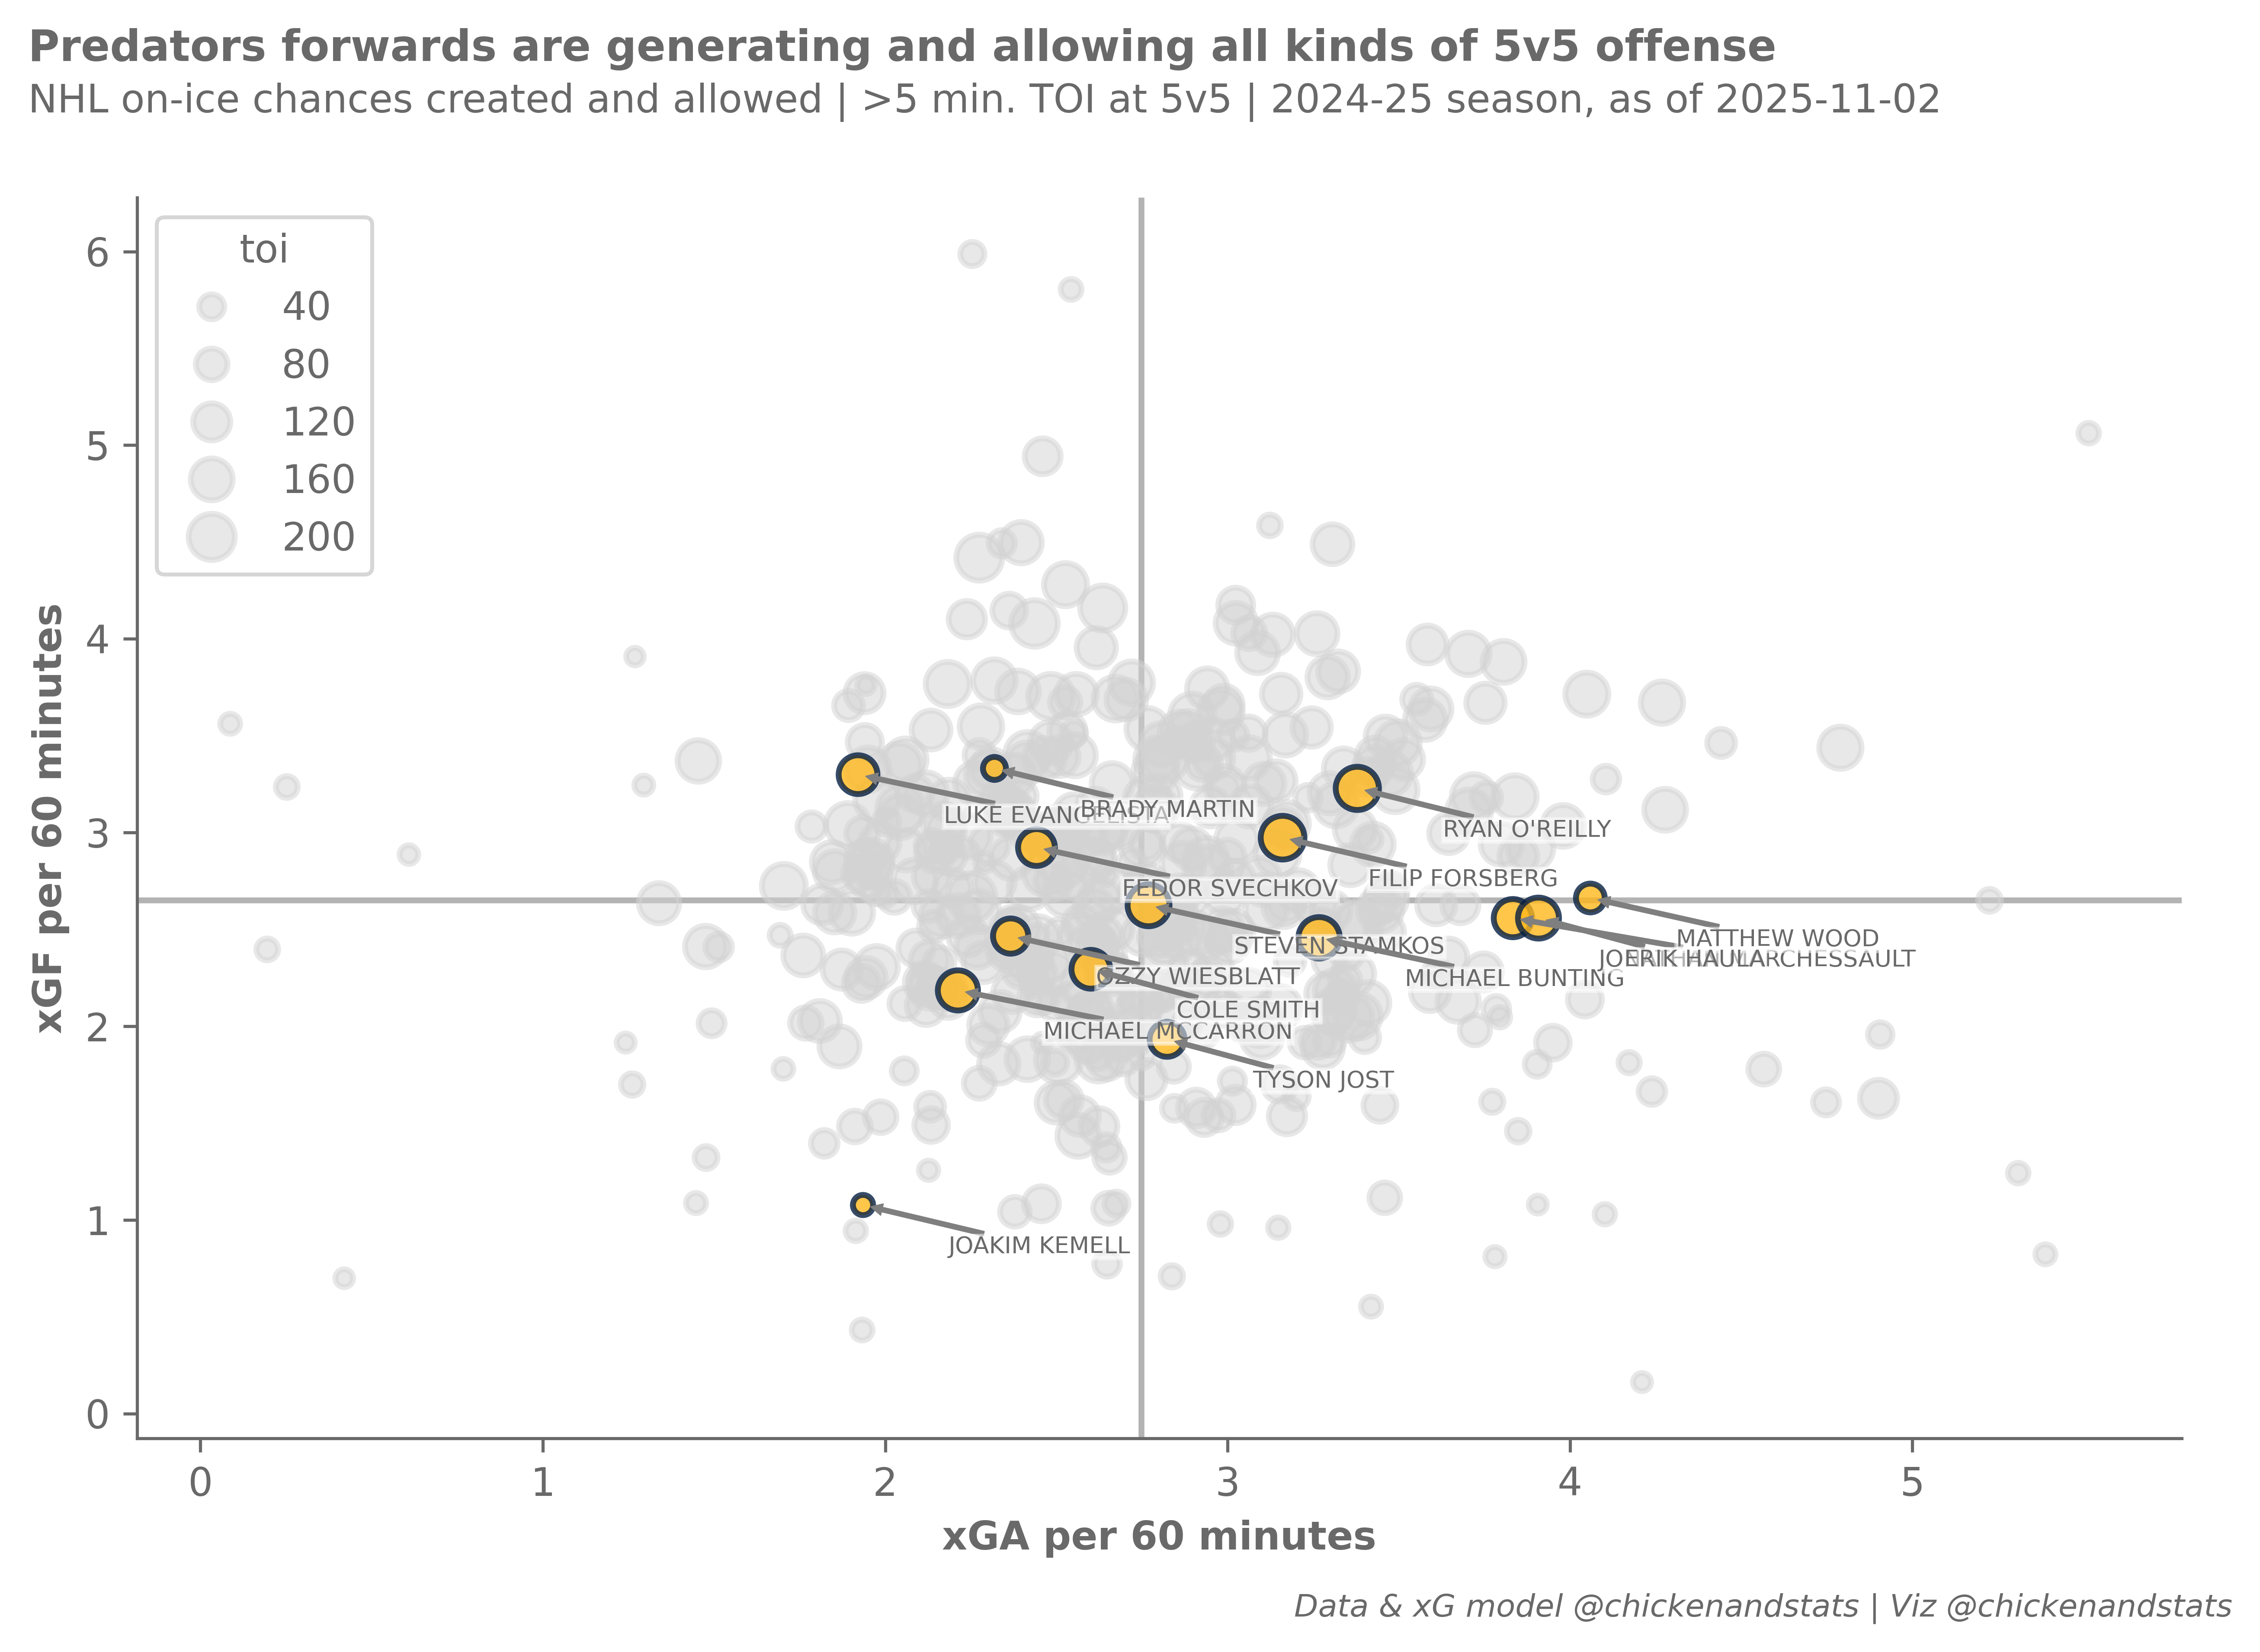

In [ ]:
# Setting overall figures
fig, ax = plt.subplots(dpi=650, figsize=(8, 5))

# Aesthetics, likes the tight layout and despining axes
fig.tight_layout()
sns.despine()

# Getting the averages and drawing the average lines
xga_mean = plot_stats.xga_p60.mean()
xgf_mean = plot_stats.xgf_p60.mean()

ax.axvline(x=xga_mean, zorder=-1, alpha=0.5)
ax.axhline(y=xgf_mean, zorder=-1, alpha=0.5)

# Setting the size norm so bubbles are consistent across figures
size_norm = (plot_stats.toi.min(), plot_stats.toi.max())

# Filtering data and plotting the non-selected teams first
conds = plot_stats.team != team
plot_data = plot_stats.loc[conds]

# They all get gray colors
facecolor = colors["MISS"]
edgecolor = colors["MISS"]

# Plotting the non-selected teams' data
sns.scatterplot(
    data=plot_data,
    x="xga_p60",
    y="xgf_p60",
    size="toi",
    sizes=(20, 150),
    size_norm=size_norm,
    lw=1.5,
    facecolor=facecolor,
    edgecolor=edgecolor,
    alpha=0.5,
    legend=True,
)

# Filtering the data and plotting the selected team
conds = plot_stats.team == team
plot_data = plot_stats.loc[conds]

# Setting the colors
facecolor = colors["GOAL"]
edgecolor = colors["SHOT"]

# Plotting the selected teams' data
sns.scatterplot(
    data=plot_data,
    x="xga_p60",
    y="xgf_p60",
    size="toi",
    sizes=(20, 150),
    size_norm=size_norm,
    lw=1.5,
    facecolor=facecolor,
    edgecolor=edgecolor,
    alpha=0.8,
    legend=False,
)

# Iterating through the dataframe to label the bubbles
for row, player in plot_data.iterrows():
    # Setting x and y positions that are slightly offset from the data they point to
    x_position = player.xga_p60 + 0.25
    y_position = player.xgf_p60 - 0.25

    # Annotation options
    arrow_props = {"arrowstyle": "simple", "linewidth": 0.25, "color": "tab:gray"}

    # Plotting the annotation
    ax.annotate(
        text=f"{player.player}",
        xy=(player.xga_p60, player.xgf_p60),
        xytext=(x_position, y_position),
        fontsize=6,
        bbox={"facecolor": "white", "alpha": 0.5, "edgecolor": "white", "pad": 0},
        arrowprops=arrow_props,
    )

# Setting axis lables
ax.axes.set_xlabel("xGA per 60 minutes")
ax.axes.set_ylabel("xGF per 60 minutes")

# Setting figure suptitle and subtitle
fig_suptitle = "Predators forwards are generating and allowing all kinds of 5v5 offense"
fig.suptitle(fig_suptitle, x=0.01, y=1.08, fontsize=11, fontweight="bold", horizontalalignment="left")

subtitle = f"NHL on-ice chances created and allowed | >{toi_min} min. TOI at 5v5 | 2024-25 season, as of {latest_date}"
fig.text(s=subtitle, x=0.01, y=1.02, fontsize=10, horizontalalignment="left")

# Attribution
attribution = "Data & xG model @chickenandstats | Viz @chickenandstats"
fig.text(s=attribution, x=0.99, y=-0.05, fontsize=8, horizontalalignment="right", style="italic")

# Save figure
savepath = Path(f"./charts/5v5_xgf_xga_{team}.png")
fig.savefig(savepath, transparent=False, bbox_inches="tight")

### xGF and GF 

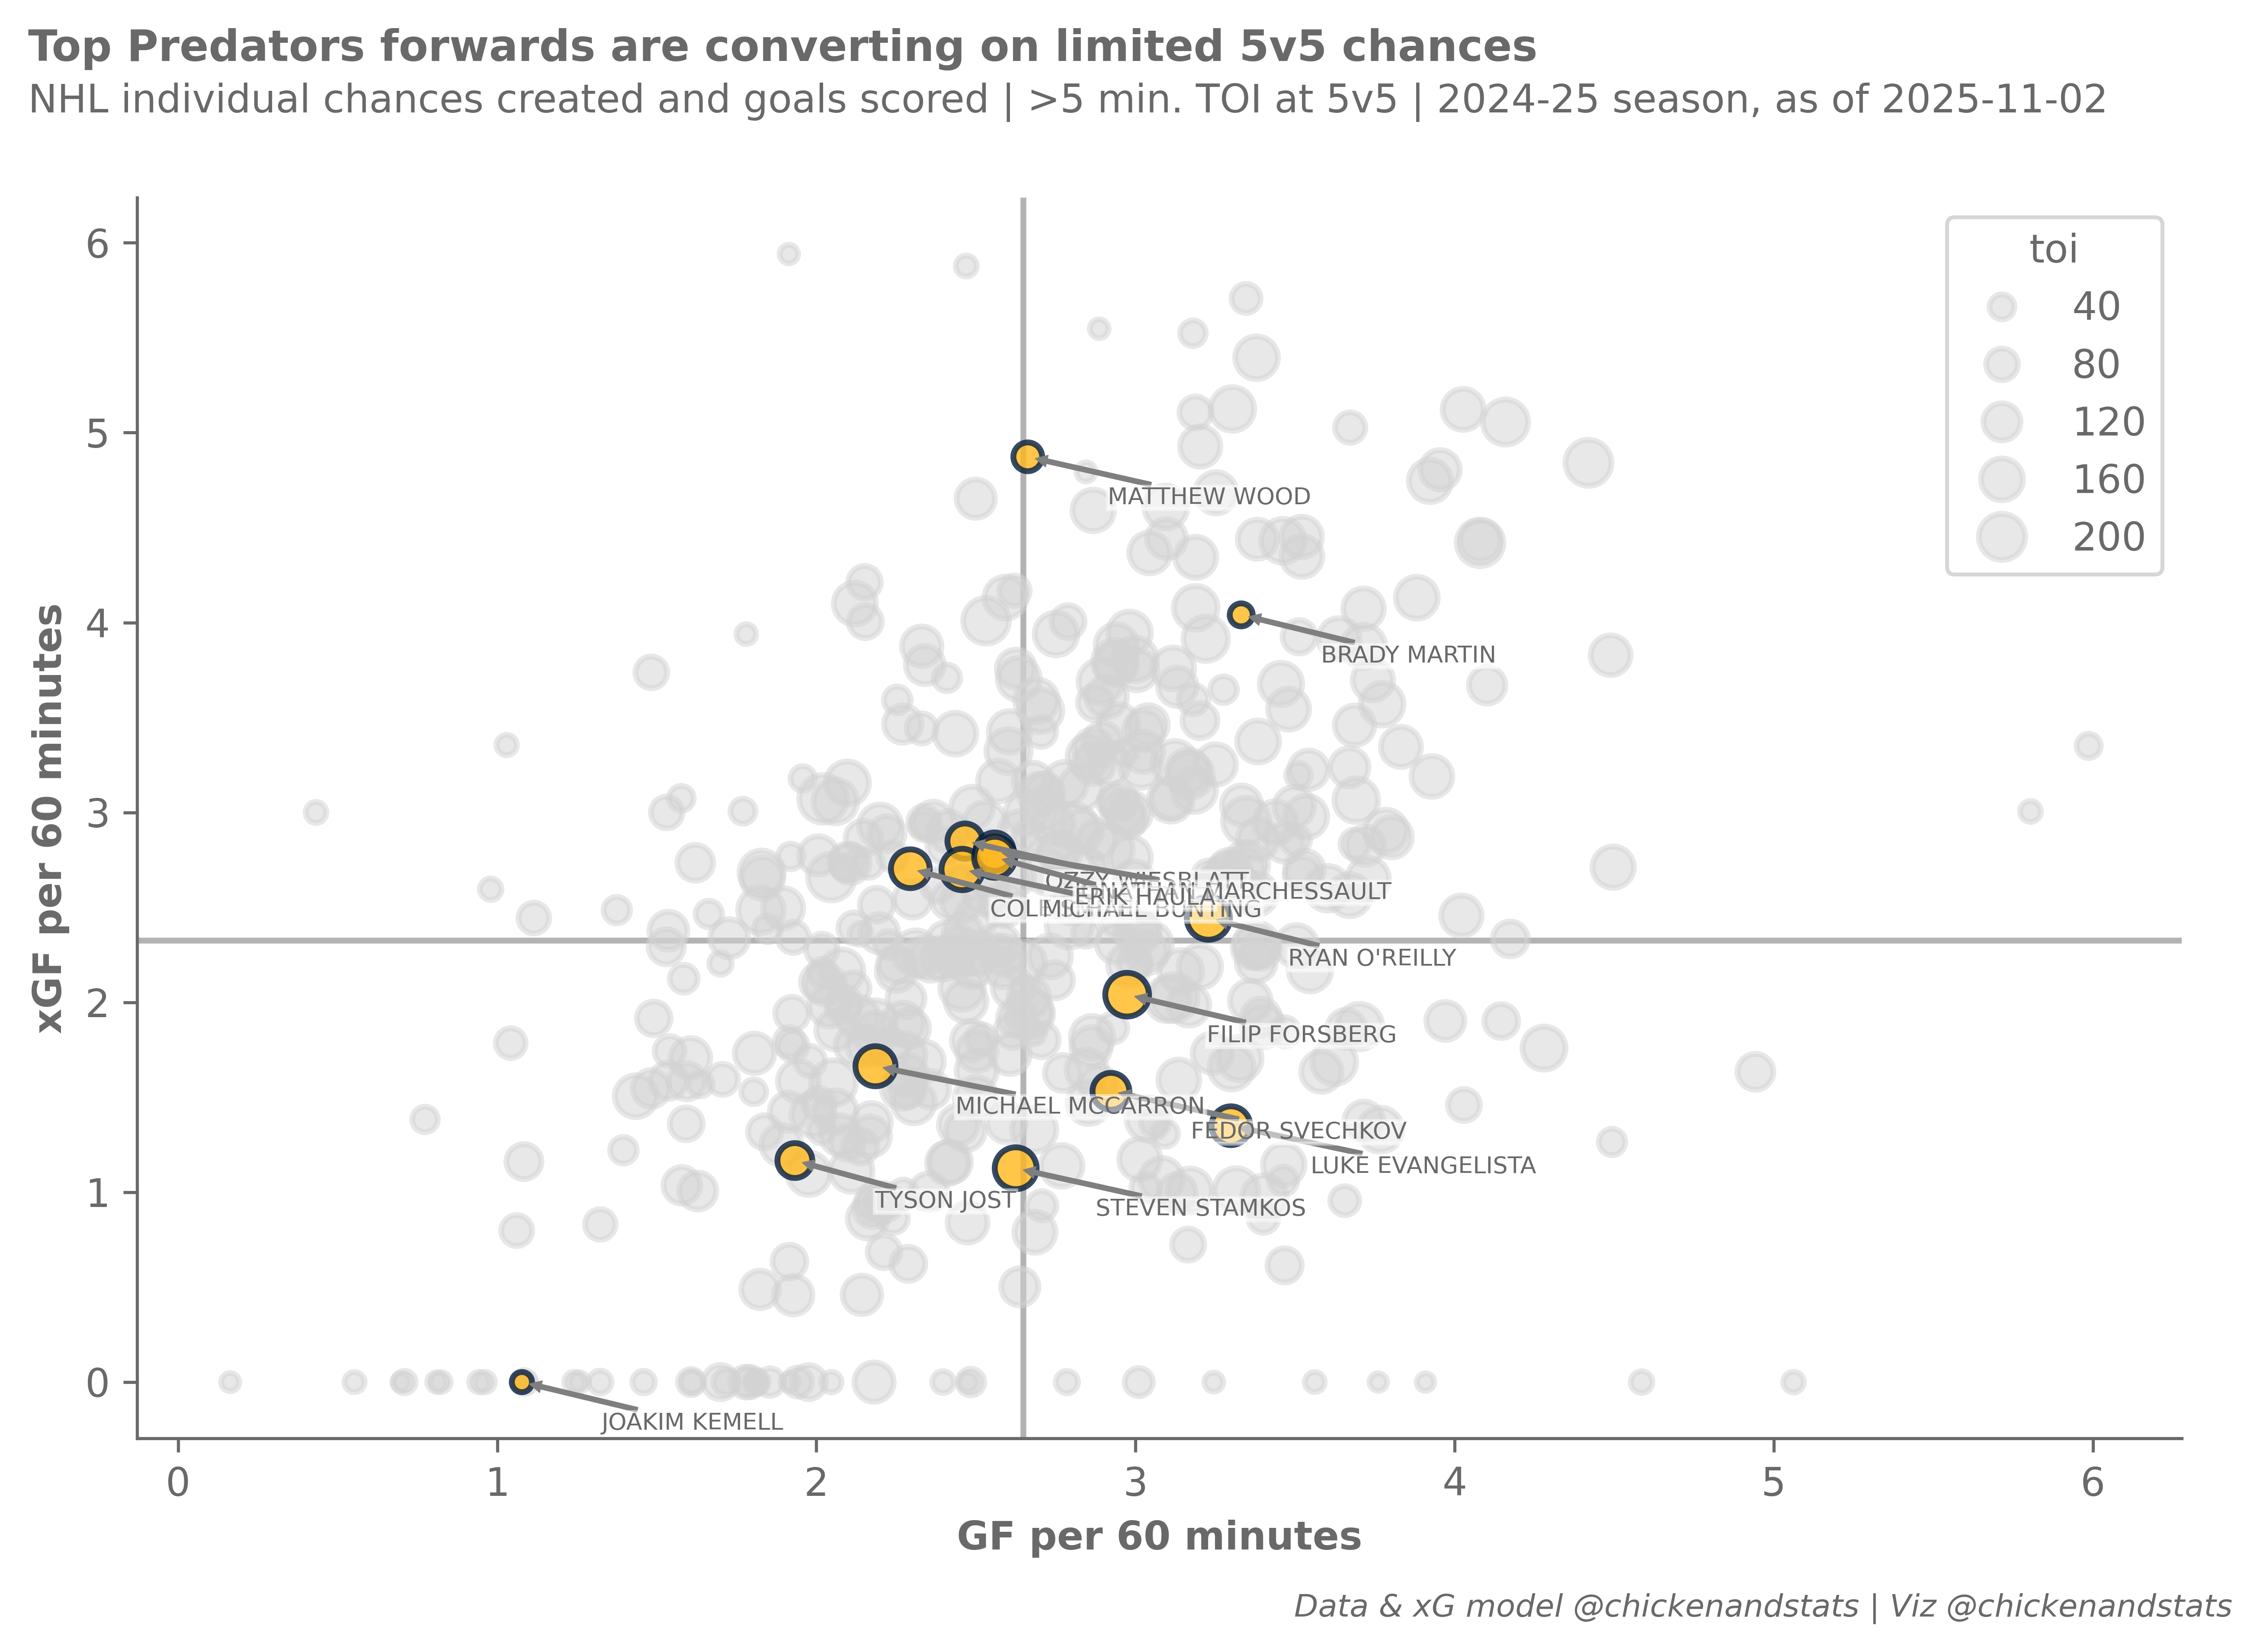

In [ ]:
# Setting overall figures
fig, ax = plt.subplots(dpi=650, figsize=(8, 5))

# Aesthetics, likes the tight tight layout and despining axes
fig.tight_layout()
sns.despine()

# Getting the averages and drawing the average lines
gf_mean = plot_stats.gf_p60.mean()
xgf_mean = plot_stats.xgf_p60.mean()

ax.axhline(y=gf_mean, zorder=-1, alpha=0.5)
ax.axvline(x=xgf_mean, zorder=-1, alpha=0.5)

# Setting the size norm so bubbles are consistent across figures
size_norm = (plot_stats.toi.min(), plot_stats.toi.max())

# Getting plot colors based on team
colors = NHL_COLORS[team]

# Filtering data and plotting the non-selected teams first
conds = plot_stats.team != team
plot_data = plot_stats.loc[conds]

# They all get gray colors
facecolor = colors["MISS"]
edgecolor = colors["MISS"]

# Plotting the non-selected teams' data
sns.scatterplot(
    data=plot_data,
    x="xgf_p60",
    y="gf_p60",
    size="toi",
    sizes=(20, 150),
    size_norm=size_norm,
    lw=1.5,
    facecolor=facecolor,
    edgecolor=edgecolor,
    alpha=0.5,
    legend=True,
)

# Filtering and plotting the selected teams' data
conds = plot_stats.team == team
plot_data = plot_stats.loc[conds]

# Setting the colors
facecolor = colors["GOAL"]
edgecolor = colors["SHOT"]

# Plotting the selected team's data
sns.scatterplot(
    data=plot_data,
    x="xgf_p60",
    y="gf_p60",
    size="toi",
    sizes=(20, 150),
    size_norm=size_norm,
    lw=1.5,
    facecolor=facecolor,
    edgecolor=edgecolor,
    alpha=0.8,
    legend=False,
)

# Iterating through the dataframe to label the bubbles
for row, player in plot_data.iterrows():
    # Setting x and y positions that are slightly offset from the data they point to
    x_position = player.xgf_p60 + 0.25
    y_position = player.gf_p60 - 0.25

    # Annotation options
    arrow_props = {"arrowstyle": "simple", "linewidth": 0.25, "color": "tab:gray"}

    # Plotting the annotation
    ax.annotate(
        text=f"{player.player}",
        xy=(player.xgf_p60, player.gf_p60),
        xytext=(x_position, y_position),
        fontsize=6,
        bbox={"facecolor": "white", "alpha": 0.5, "edgecolor": "white", "pad": 0},
        arrowprops=arrow_props,
    )

# Setting x and y axes labels
ax.axes.set_xlabel("GF per 60 minutes")
ax.axes.set_ylabel("xGF per 60 minutes")

# Figure suptitle and subtitle
fig_suptitle = "Top Predators forwards are converting on limited 5v5 chances"
fig.suptitle(fig_suptitle, x=0.01, y=1.08, fontsize=11, fontweight="bold", horizontalalignment="left")

subtitle = f"NHL individual chances created and goals scored | >{toi_min} min. TOI at 5v5 | 2024-25 season, as of {latest_date}"
fig.text(s=subtitle, x=0.01, y=1.02, fontsize=10, horizontalalignment="left")

# Figure attribution
attribution = "Data & xG model @chickenandstats | Viz @chickenandstats"
fig.text(s=attribution, x=0.99, y=-0.05, fontsize=8, horizontalalignment="right", style="italic")

# Save figure
savepath = Path(f"./charts/5v5_xgf_gf_{team}.png")
fig.savefig(savepath, transparent=False, bbox_inches="tight")